<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape
# 979 rows and 6 columns

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies[['duration', 'title']].agg(['max', 'min'])

,duration,title
max,242,[Rec]
min,64,(500) Days of Summer


#### Create a histogram of duration, choosing an "appropriate" number of bins.

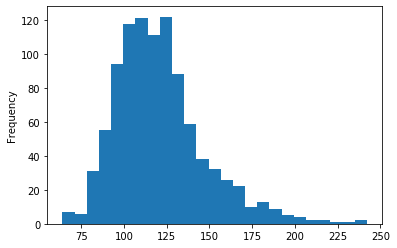

In [8]:
# Answer:
movies['duration'].plot(kind = 'hist', bins = 25);

#### Use a box plot to display that same data.

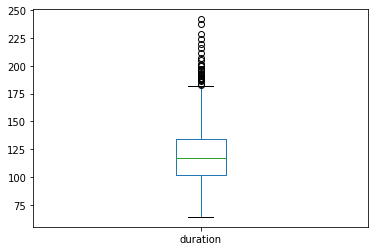

In [9]:
# Answer:
movies['duration'].plot(kind = 'box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.groupby('content_rating')['title'].count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

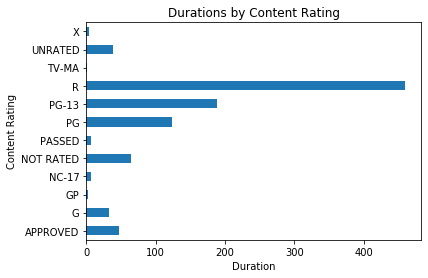

In [11]:
# Answer:
movies.groupby('content_rating')['title'].count().plot(kind = 'barh', title = 'Durations by Content Rating');
plt.xlabel('Duration');
plt.ylabel('Content Rating');


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
x = dict.fromkeys(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')
movies['content_rating'].replace(x, inplace = True)
movies.groupby(['content_rating'])['title'].count()

content_rating
G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
Name: title, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
x1 = dict.fromkeys(['X', 'TV-MA'], 'NC-17')
movies['content_rating'].replace(x1, inplace = True)
movies.groupby(['content_rating'])['title'].count()

content_rating
G           32
NC-17       12
PG         123
PG-13      189
R          460
UNRATED    160
Name: title, dtype: int64

#### Count the number of missing values in each column.

In [14]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
movies[movies['content_rating'].isnull()]



,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
movies['content_rating'].fillna('R', inplace = True)

In [17]:
movies['content_rating'].isnull().sum()

0

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [18]:
# Answer:
above_two = movies[movies['duration'] >= 120]['star_rating'].mean()
below_two = movies[movies['duration'] < 120]['star_rating'].mean()
print(above_two, below_two)

7.948898678414082 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

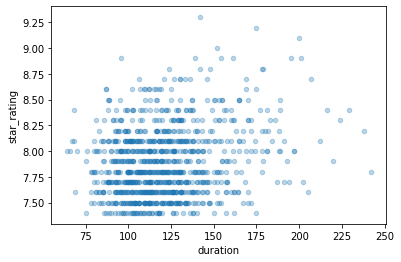

In [19]:
# Answer:
movies.plot(kind = 'scatter', x='duration', y='star_rating', alpha = 0.3);

#### Calculate the average duration for each genre.

In [20]:
# Answer:
movies.groupby(['genre'])['title','duration'].mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

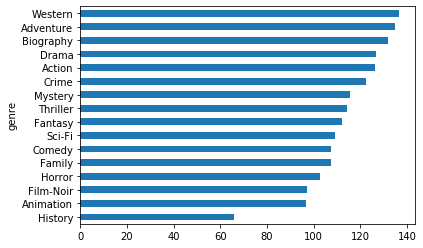

In [21]:
# Answer:
movies.groupby(['genre'])['duration'].mean().sort_values().plot(kind = 'barh');

#### Determine the top rated movie (by star rating) for each genre.

In [22]:
# Answer:
movies.groupby('genre')['title', 'star_rating'].max()

,title,star_rating
genre,,
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Animation,Wreck-It Ralph,8.6
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Crime,Zodiac,9.3
Drama,Zulu,8.9
Family,Willy Wonka & the Chocolate Factory,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [23]:
# Answer:
# movies['title'].duplicated().sum()
movies[movies['title'].duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,R,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [62]:
# Answer:
movies.groupby('genre')['title'].count() > 10
above_ten_1 = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama']

if movies['genre'] == above_ten_1:
    

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [141]:
# Answer:
movies['above'] = movies['genre'].value_counts() > 10

# movies['above_ten'] = movies.apply(lambda row: row.groupby('genre')['title'].count() >= 10, axis = 1)

movies.loc[movies['above'] == True, 'star_rating']


Series([], Name: star_rating, dtype: float64)

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [127]:
# Answer:
movies.groupby('genre')['star_rating'].mean()
# above_ten = movies.groupby('genre')['star_rating'].count() >= 10
# print(above_ten)

# movies[above_ten].mean()

# movies[movies.groupby('genre').count() >= 10]

movies.loc[movies['genre'] == 'Action', 'star_rating']


IndexingError: Too many indexers

#### Option 4: aggregate by count and mean, then filter using the count

In [137]:
# Answer:

movies.groupby('genre')['star_rating'].agg(['count', 'mean']).sort_values('count', ascending=False)

,count,mean
genre,,
Drama,278,7.902518
Comedy,156,7.822436
Action,136,7.884559
Crime,124,7.916935
Biography,77,7.862338
Adventure,75,7.933333
Animation,62,7.914516
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [121]:
most = movies['actors_list'].max()



# actors = movies['actors_list']

# for actor in actors:
#     print(actor)